#Neural Network Classification For Hand Written Digits

In [ ]:
#import package to handle maths and arrays
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# importing a module for splitting a dataset into train, and test
from sklearn.model_selection import train_test_split
# import tensorflow to create a Neural Network classifier
import tensorflow as tf
from tensorflow import keras
# confusion metric
from sklearn import metrics
import seaborn as sns

##Mounting the google drive to Access Data

In [ ]:
#mount the google drive to access the data 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change the directory to the folder with the data
%cd /content/gdrive/MyDrive/Deep_learning/Assignment_1

/content/gdrive/MyDrive/Deep_learning/Assignment_1


##Importing and Loading The Data

In [ ]:
#import the data and download it into your directory
#if this has been ran before select n to not overide the data
!curl -O 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
!gunzip t*-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  6483k      0  0:00:01  0:00:01 --:--:-- 6483k
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [ ]:
#split the data into train data, labels for training data, testing data and labels for testing data
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    X_train, X_labels = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

else:
    X_train, X_labels = loadlocal_mnist(
            images_path='train-images.idx3-ubyte', 
            labels_path='train-labels.idx1-ubyte')

if not platform.system() == 'Windows':
    Y_test, Y_labels = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

else:
    Y_test, Y_labels = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

In [ ]:
#check the dimensions of the data to ensure they have been correctly split and assigned to an array
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

In [ ]:
#print and save the labels into into X_labels for the training data
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(X_labels))
print('Class distribution: %s' % np.bincount(X_labels))
#check the shape of the training and testing data to ensure the splitting of data was done correctly
print(np.shape(X_train))
print(np.shape(Y_test))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
(60000, 784)
(10000, 784)


##Initial Reshaping

In [ ]:
#reshape the raw data into a 28x28 array of pixels
#this is needed for data visualization
X_train=X_train.reshape(-1,28,28)
Y_test=Y_test.reshape(-1,28,28)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


##Visualizing the Data

5
0
5
3


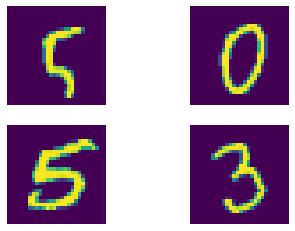

In [ ]:
#Display samples of the training data with its correlating labels
#using plt.figure to plot the images in a 2x2 block
img_index = 100
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train[img_index])
print(X_labels[img_index])

##Histogram-of-Oriented Gradient (HOG) feature extraction

In [ ]:
#import skimage to use feature extraction
from skimage import feature
#initialise the lists needed to store the HOG feature data
hog_train_data = []
hog_train_labels = []
hog_test_data = []
hog_test_labels = []
hog_images_train = []
hog_images_test = []

In [ ]:
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
  image = X_train[img_index] 
  
  # use orientation =9, pixel_per_cell=(10,10), cells_per_block=2,2, 
  # transform_sqrt=True and block_norm="L2-Hys"
  hog, hog_image = feature.hog(image, orientations= 9, pixels_per_cell=(10,10), cells_per_block=(2,2), visualize=True, transform_sqrt=True, block_norm = 'L2-Hys')  
 
  # update the data and labels
  hog_train_data.append(hog) 
  hog_train_labels.append(X_labels[img_index]) 
  hog_images_train.append(hog_image)

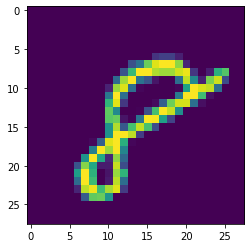

In [ ]:
#show a sample of the data before HOG extraction
plt.imshow(X_train[img_index])

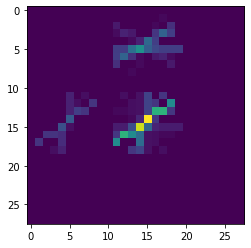

In [ ]:
#show a the same data sample after it has undergone feature extraction
plt.imshow(hog_images_train[img_index])

In [ ]:
#do the same feature extraction for the testing data
for img_index_2 in range(len(Y_test)):
  # load the image, and extract HOG features it
  image = Y_test[img_index_2]
  # use orientation =9, pixel_per_cell=(10,10), cells_per_block=2,2, 
  # transform_sqrt=True and block_norm="L2-Hys"
  hog, hog_image_test = feature.hog(image, orientations= 9, pixels_per_cell=(10,10), cells_per_block=(2,2), visualize=True, transform_sqrt=True, block_norm = 'L2-Hys') 
 
  # update the data and labels
  hog_test_data.append(hog) 
  hog_test_labels.append(Y_labels[img_index_2])
  hog_images_test.append(hog_image_test) 

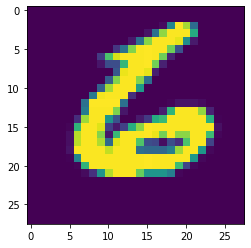

In [ ]:
#show a sample of the data before HOG extraction
plt.imshow(Y_test[img_index_2])

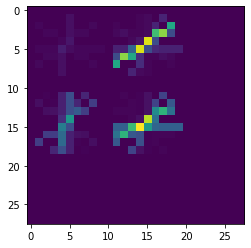

In [ ]:
#show the same data sample after it has undergone feature extraction
plt.imshow(hog_images_test[img_index_2])

In [ ]:
#Check how the HOG feature extraction changed the shape of the data
print(np.shape(hog_train_data))
print(np.shape(hog_train_labels))
print(np.shape(hog_test_data))
print(np.shape(hog_test_labels))

(60000, 36)
(60000,)
(10000, 36)
(10000,)


##Normalizing the dataset

In [ ]:
#Normalize the raw data by dividing the data points by 255.0
#255.0 is chosen because colour is (0-255) so by dividing it by 255 all the data points will be between (0-1)
#The training data was also split up into training and validating data sets
#5000 samples were allocated to the validation data set
valid_images = X_train[:5000] / 255.0
valid_labels = X_labels[:5000]


train_images = X_train[5000:] / 255.0
train_labels = X_labels[5000:]

test_images = Y_test / 255.0

In [ ]:
#Check the shape of the three data sets
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


In [ ]:
#Change the data structure of the HOG data from a list to an array
hog_images_train = np.array(hog_train_data)
hog_train_labels = np.array(hog_train_labels)
hog_test_data = np.array(hog_test_data)
hog_test_labels = np.array(hog_test_labels)

In [ ]:
#Normalize the raw data by dividing the data points by 255.0
#Split data into training and validating data sets
#5000 samples were allocated to the validation data set
valid_Hog_images = hog_images_train[:5000] / 255.0
valid_Hog_labels = hog_train_labels[:5000]

Hog_train_images = hog_images_train[5000:] / 255.0
Hog_train_labels = hog_train_labels[5000:]

Hog_test_data = hog_test_data / 255.0

##Creating the Neural Network

In [ ]:
#Design an ANN with 4 layers, first layer flattens the images that are 28x28 into 784 input neurons
#two hidden layers with 256 neurons and then 128 neurons both with a ReLu activation function
#Final layer has 10 output neurons for the 10 classes and a softmax activation function which is used for multi-class classification ANN
NN_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#Compile the model with an Adam() optimizer, a 'sparse_categorical_crossentropy' loss function
#the metric for optimization is set to 'accuracy'
NN_model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Train The Neural Network On The Raw Data

In [ ]:
#Fit and train the ANN on the raw data
M = NN_model.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2143 - accuracy: 0.9360 - val_loss: 0.1080 - val_accuracy: 0.9664
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0908 - accuracy: 0.9715 - val_loss: 0.0924 - val_accuracy: 0.9700
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0619 - accuracy: 0.9795 - val_loss: 0.0812 - val_accuracy: 0.9756
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0449 - accuracy: 0.9849 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0782 - val_accuracy: 0.9794
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0990 - val_accuracy: 0.9750
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0756 - val_accuracy:

##Evaluate Model On Raw Data

In [ ]:
#Test the accuracy of the ANN on the testing data
NN_loss, NN_accuracy = NN_model.evaluate(test_images, Y_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9785


In [ ]:
#print out the accuracy
print(NN_accuracy)

0.9785000085830688


##Train The Neural Network On The HOG Data

In [ ]:
#design the ANN for the HOG data, the model is the same except it takes in a 1D vector of 36 instead of 28x28
#HOG data is a 36 sized 1D vector which is why the input shape had to be changed
NN_model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[36]), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#use the same compiler for the second model
NN_model_2.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit and train the ANN on the HOG data
M = NN_model_2.fit(Hog_train_images, Hog_train_labels, epochs=10, validation_data=(valid_Hog_images, valid_Hog_labels))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.0341 - accuracy: 0.2297 - val_loss: 1.7713 - val_accuracy: 0.3668
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6111 - accuracy: 0.4214 - val_loss: 1.3827 - val_accuracy: 0.4950
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3178 - accuracy: 0.4985 - val_loss: 1.2433 - val_accuracy: 0.5204
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 1.2196 - accuracy: 0.5293 - val_loss: 1.1573 - val_accuracy: 0.5416
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 1.1621 - accuracy: 0.5568 - val_loss: 1.1057 - val_accuracy: 0.5784
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1020 - accuracy: 0.5892 - val_loss: 1.0295 - val_accuracy: 0.6194
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0105 - accuracy: 0.6336 - val_loss: 0.9252 - val_accuracy:

In [ ]:
#Test the accuracy of the ANN on the HOG testing data
NN_loss_Hog, NN_accuracy_Hog = NN_model_2.evaluate(Hog_test_data, hog_test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.8024 - accuracy: 0.7116


In [ ]:
#print out the accuracy
print(NN_accuracy_Hog)

0.7116000056266785


##Evaluation of Model

In [ ]:
#give a summary of the first ANN used
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#give a summary of the second ANN used
NN_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               9472      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 43,658
Trainable params: 43,658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#output the predicted labels of the ANN for the raw data
pred = NN_model.predict(test_images)

In [ ]:
#output the predicted labels of the ANN for the HOG data
pred_Hog = NN_model_2.predict(Hog_test_data)

In [ ]:
#create a list for the predicted labels
predict_test =[]
predict_test.append(pred)
#create an array using the predicted labels
predict_test = np.array(pred)
#reshape the array for the confusion matrix
predict_labels = np.argmax(predict_test, axis=-1)

In [ ]:
#create a list for the HOG predicted labels
predict_test_Hog =[]
predict_test_Hog.append(pred_Hog)
#create an array using the HOG predicted labels
predict_test_Hog = np.array(pred_Hog)
#reshape the array for the confusion matrix
predict_labels_Hog = np.argmax(predict_test_Hog, axis=-1)

##Confusion Matrix For Raw Data

In [ ]:
#Create a confusion matrix taking in the true labels "Y_labels" and comparing them agains the predicted labels "predict_labels"
cm  = metrics.confusion_matrix(Y_labels, predict_labels)
print(cm)

[[ 974    0    1    0    0    0    2    1    2    0]
 [   4 1122    0    1    1    1    2    0    4    0]
 [   1    1 1004    7    3    0    1    4   10    1]
 [   0    0    2  991    0    4    0    4    2    7]
 [   2    0    4    0  959    0    3    2    1   11]
 [   3    0    0   10    1  871    2    1    2    2]
 [   6    2    1    0    8    5  936    0    0    0]
 [   0    5    7    0    0    0    0 1007    4    5]
 [   8    0    2    6    2    7    1    2  940    6]
 [   1    2    0    2    6    4    1   10    2  981]]


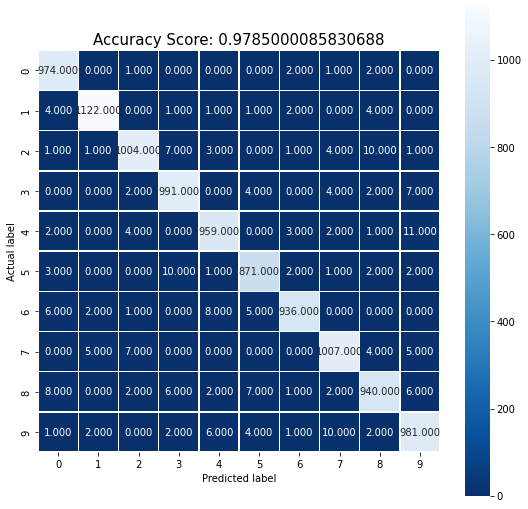

In [ ]:
#Using sns to make the confusion matrix more visibly pleasing
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(NN_accuracy)
plt.title(all_sample_title, size = 15);

##Confusion Matrix For HOG Data

In [ ]:
#Create a confusion matrix taking in the true labels "hog_test_labels" and comparing them agains the predicted labels "pred"
cm_2  = metrics.confusion_matrix(hog_test_labels, predict_labels_Hog)
print(cm_2)

[[ 886    3    3    0    1    4   24    2   42   15]
 [  22 1061    9    1   18    1   10    4    0    9]
 [  29   11  670  107    4    8    1   59   99   44]
 [   1    0  106  667    0  107    1   17   89   22]
 [  14   15    1    1  670    5  217   21    3   35]
 [   1    1    2   39    5  728   14    3   75   24]
 [  46    2    0    0   26   13  857    0   11    3]
 [  20   17  239   58   18   10    0  589   13   64]
 [ 169    0   36   75    1   97   35    1  513   47]
 [ 101    2   17    8    6   50   11   23  316  475]]


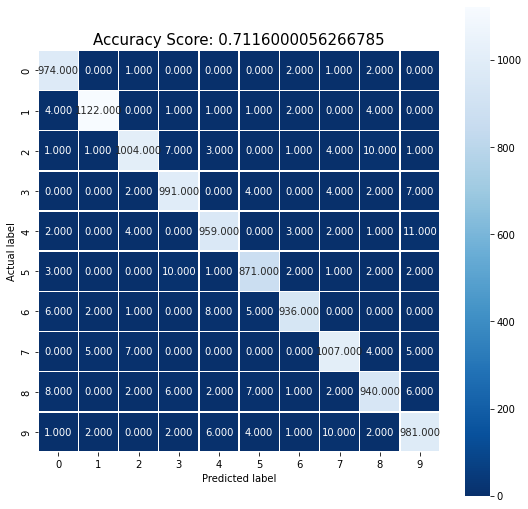

In [ ]:
#Using sns to make the confusion matrix more visibly pleasing
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(NN_accuracy_Hog)
plt.title(all_sample_title, size = 15);

##Displaying Classification Results

###Results For Raw Data

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)
2
1
0
4


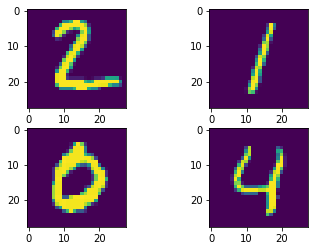

In [ ]:
#Reshape the data for visualization
X_train=X_train.reshape(-1,28,28)
Y_test=Y_test.reshape(-1,28,28)
print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(Y_test)))

#Display sample images of the raw data and the predicted labels to test whether the model
#correctly predicted the hand written digits from the raw data
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(Y_test[1])
print(predict_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(Y_test[2])
print(predict_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(Y_test[3])
print(predict_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(Y_test[4])
print(predict_labels[4])

###Results For HOG Data

0
1
0
6


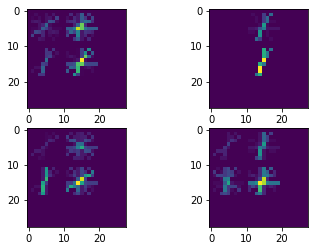

In [ ]:
#Display sample images of the HOG data and the predicted labels to test whether the model
#correctly predicted the hand written digits from the HOG data
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(hog_images_test[1])
print(predict_labels_Hog[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(hog_images_test[2])
print(predict_labels_Hog[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(hog_images_test[3])
print(predict_labels_Hog[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(hog_images_test[4])
print(predict_labels_Hog[4])

###Find incorrect prediction on raw data.

In [ ]:
count_y = 0
count_x = 0
#Loop through the data set of 'Y_labels' and 'predict_labels' to find an example where the prediction did not equal the true value
while(Y_labels[count_y] == predict_labels[count_x]):
  count_y +=1
  count_x +=1
print(Y_labels[count_y])
print(predict_labels[count_x])


9
7


Predicted value:  7
True value:  9


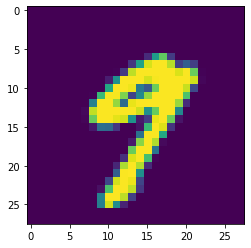

In [ ]:
#print out the predicted value, the true value and the image being contested
print('Predicted value: ', predict_labels[count_x])
print('True value: ', Y_labels[count_y])
plt.imshow(Y_test[count_y])
